In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("globalterrorism.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Columns: 135 entries, eventid to related
dtypes: float64(62), int64(22), object(51)
memory usage: 3.0+ MB


In [4]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.909000e+03,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2861.000000,2861.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,537.000000,2909.000000,2909.000000,2909.0,2909.000000,14.000000,1.0,2909.000000,2801.000000,2901.000000,60.000000,53.000000,55.000000,2.000000,2.000000,2.00000,0.0,0.0,0.0,2909.000000,4.00,0.0,2909.000000,1023.000000,720.000000,...,0.0,0.0,0.0,0.0,3.0,2909.000000,2536.000000,128.000000,112.000000,8.000000,7.000000,0.0,0.0,0.0,0.0,2604.000000,840.000000,819.000000,1847.000000,827.000000,776.000000,2909.000000,1142.000000,6.020000e+02,2850.000000,220.000000,220.000000,90.000000,83.000000,2766.000000,8.900000e+01,1.0,3.400000e+01,0.0,161.000000,115.000000,2908.000000,2908.000000,2908.000000,2908.000000
mean,1.972186e+11,1972.122723,6.138536,15.382606,0.032314,294.377106,5.131317,35.713904,-35.403239,1.088003,0.004469,0.999312,0.988312,0.876246,-0.687865,1.381750,0.088690,0.880028,0.0,3.152286,4.214286,2.0,6.534204,39.042128,190.812823,9.800000,53.245283,214.090909,4.000000,26.500000,189.00000,NaN,NaN,NaN,0.037814,0.25,NaN,0.003094,-54.878788,-84.883333,...,NaN,NaN,NaN,NaN,0.0,6.431763,12.560331,6.640625,11.544643,7.875000,14.000000,NaN,NaN,NaN,NaN,0.740015,0.177381,0.098901,1.226854,0.440145,0.015464,0.396012,3.226795,1.393301e+05,0.077193,-4.054545,0.272727,-2.055556,22.024096,0.032176,1.531135e+06,20000.0,2.518029e+06,NaN,2.782609,9.852174,-3.232462,-3.148900,0.527510,-1.452545
std,1.584058e+08,1.585828,3.421309,9.095383,0.176862,208.206269,3.510636,24.617529,53.617887,0.563527,0.066712,0.026216,0.107495,0.329357,2.750677,0.583896,0.284345,0.324985,0.0,1.963695,2.516975,NaN,5.533313,27.345808,70.857875,5.965437,25.157890,48.111858,4.242641,26.162951,39.59798,NaN,NaN,NaN,0.190778,0.50,NaN,0.055546,51.711935,34.976173,...,NaN,NaN,NaN,NaN,0.0,1.986864,7.237007,1.893771,7.405730,2.799872,11.224972,NaN,NaN,NaN,NaN,3.219048,1.173084,0.459867,9.036100,2.802150,0.182507,1.447831,0.462683,7.327831e+05,0.266944,46.335551,7.870422,18.663406,42.850556,0.176500,6.758437e+06,NaN,7.441265e+06,NaN,1.283042,35.175561,4.454597,4.530162,0.682676,4.129835
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-43.532054,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.0,1.000000,1.000000,5.000000,1.000000,1.000000,30.000000,1.000000,8.000000,161.00000,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,-99.000000,-99.000000,...,NaN,NaN,NaN,NaN,0.0,2.000000,1.000000,2.000000,2.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,NaN,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.971022e+11,1971.000000,3.000000,7.000000,0.000000,185.000000,1.000000,34.097866,-75.135490,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.000000,2.000000,2.0,2.000000,18.000000,185.000000,3.000000,25.000000,217.000000,2.500000,17.250000,175.00000,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,-99.000000,-99.000000,...,NaN,N

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [6]:
pd.DataFrame(columns=data.columns.values,index=None)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [7]:
data.isnull().sum().head(135)

eventid          0
iyear            0
imonth           0
iday             0
approxdate    2893
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       2649
Length: 135, dtype: int64

In [1]:
#data.drop('approxdate',axis=1)

In [9]:
data.rename(columns={'iyear':'YEAR','imonth':'MONTH','iday':'DAY','extended':'EXTENDED','country_txt':'COUNTRY',
                   'success':'SUCCESS','region_txt':'REGION','provstate':'STATE','city':'CITY','gname':'GROUP',
                   'attacktype1_txt':'ATTACK TYPE','latitude':'LATITUDE','longitude':'LONGITUDE',
                   'nkill':'KILLED','nwound':'WOUNDED','target1':'TARGET'},inplace=True)

In [10]:
data.head()

,eventid,YEAR,MONTH,DAY,approxdate,EXTENDED,resolution,country,COUNTRY,region,REGION,STATE,CITY,LATITUDE,LONGITUDE,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,SUCCESS,suicide,attacktype1,ATTACK TYPE,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,TARGET,...,weapsubtype4,weapsubtype4_txt,weapdetail,KILLED,nkillus,nkillter,WOUNDED,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [11]:
data=data[['YEAR','MONTH','DAY','EXTENDED','COUNTRY','REGION','STATE','CITY','LATITUDE',
       'LONGITUDE','GROUP','ATTACK TYPE','SUCCESS','KILLED','WOUNDED','TARGET']]

In [12]:
data.head(10)

,YEAR,MONTH,DAY,EXTENDED,COUNTRY,REGION,STATE,CITY,LATITUDE,LONGITUDE,GROUP,ATTACK TYPE,SUCCESS,KILLED,WOUNDED,TARGET
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,MANO-D,Assassination,1,1.0,0.0,Julio Guzman
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,23rd of September Communist League,Hostage Taking (Kidnapping),1,0.0,0.0,"Nadine Chaval, daughter"
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Unknown,Assassination,1,1.0,0.0,Employee
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Unknown,Bombing/Explosion,1,NaN,NaN,U.S. Embassy
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Unknown,Facility/Infrastructure Attack,1,NaN,NaN,U.S. Consulate
5,1970,1,1,0,United States,North America,Illinois,Cairo,37.005105,-89.176269,Black Nationalists,Armed Assault,1,0.0,0.0,Cairo Police Headquarters
6,1970,1,2,0,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,Tupamaros (Uruguay),Assassination,0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...
7,1970,1,2,0,United States,North America,California,Oakland,37.791927,-122.225906,Unknown,Bombing/Explosion,1,0.0,0.0,Edes Substation
8,1970,1,2,0,United States,North America,Wisconsin,Madison,43.076592,-89.412488,New Year's Gang,Facility/Infrastructure Attack,1,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M..."
9,1970,1,3,0,United States,North America,Wisconsin,Madison,43.072950,-89.386694,New Year's Gang,Facility/Infrastructure Attack,1,0.0,0.0,Selective Service Headquarters in Madison Wisc...


In [13]:
print('Country with most attacks: ',data['COUNTRY'].value_counts().idxmax())
print('City with most attacks: ',data['CITY'].value_counts().index[1])
print("Region with the most attacks:",data['REGION'].value_counts().idxmax())
print("Year with the most attacks:",data['YEAR'].value_counts().idxmax())
print("Month with the most attacks:",data['MONTH'].value_counts().idxmax())

Country with most attacks:  United States
City with most attacks:  New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1970
Month with the most attacks: 3


In [14]:
data['ATTACK TYPE'].value_counts()

Bombing/Explosion                      1293
Assassination                           711
Facility/Infrastructure Attack          370
Armed Assault                           293
Hostage Taking (Kidnapping)             157
Hijacking                                41
Hostage Taking (Barricade Incident)      22
Unknown                                  12
Unarmed Assault                          10
Name: ATTACK TYPE, dtype: int64

In [15]:
#print(data['GROUP'].unique())
data=data.drop('GROUP',axis=1)

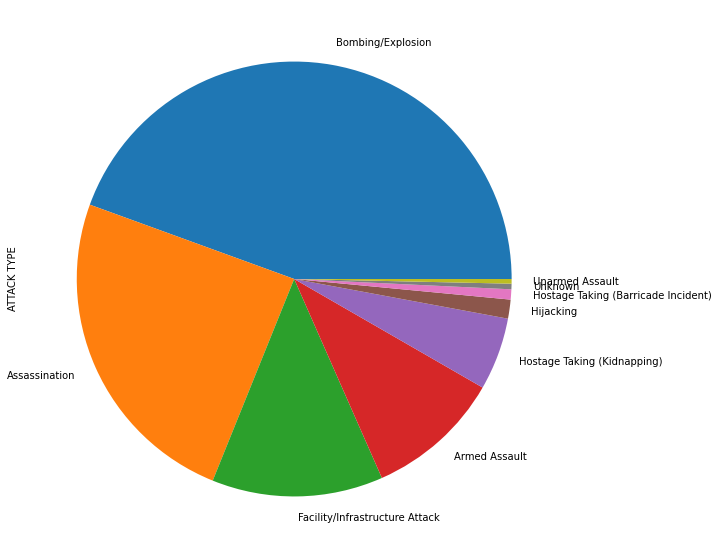

In [16]:
plt.figure(figsize=[20,10])
data['ATTACK TYPE'].value_counts().plot.pie()

plt.show()

In [17]:
country_Topcounts=data['COUNTRY'].value_counts().head(10)
country_Topcounts

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Name: COUNTRY, dtype: int64

In [18]:
data.corr()

,YEAR,MONTH,DAY,EXTENDED,LATITUDE,LONGITUDE,SUCCESS,KILLED,WOUNDED
YEAR,1.000000,-0.062903,-0.006332,-0.001883,-0.003970,0.321162,0.115987,0.083508,0.098332
MONTH,-0.062903,1.000000,0.070656,0.007375,-0.008822,0.088028,-0.023088,0.012691,0.010178
DAY,-0.006332,0.070656,1.000000,0.012406,-0.019924,-0.006608,-0.025416,0.004333,-0.027361
EXTENDED,-0.001883,0.007375,0.012406,1.000000,-0.202557,0.019724,0.061488,-0.008019,-0.014290
LATITUDE,-0.003970,-0.008822,-0.019924,-0.202557,1.000000,0.212835,0.004189,0.061085,0.062844
LONGITUDE,0.321162,0.088028,-0.006608,0.019724,0.212835,1.000000,0.033843,0.176155,0.107193
SUCCESS,0.115987,-0.023088,-0.025416,0.061488,0.004189,0.033843,1.000000,0.068915,0.052599
KILLED,0.083508,0.012691,0.004333,-0.008019,0.061085,0.176155,0.068915,1.000000,0.227778
WOUNDED,0.098332,0.010178,-0.027361,-0.014290,0.062844,0.107193,0.052599,0.227778,1.000000


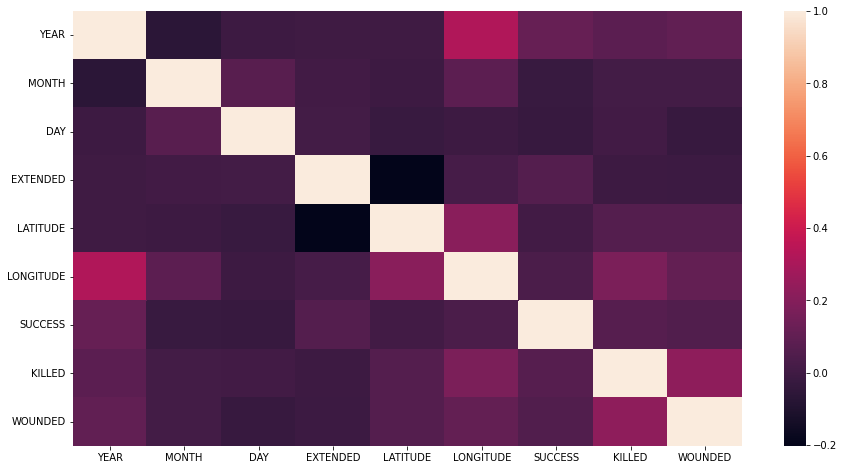

In [19]:
#Generating heatmap for correlation ploy
plt.figure(figsize=[15,8])
sns.heatmap(data.corr())
plt.show()

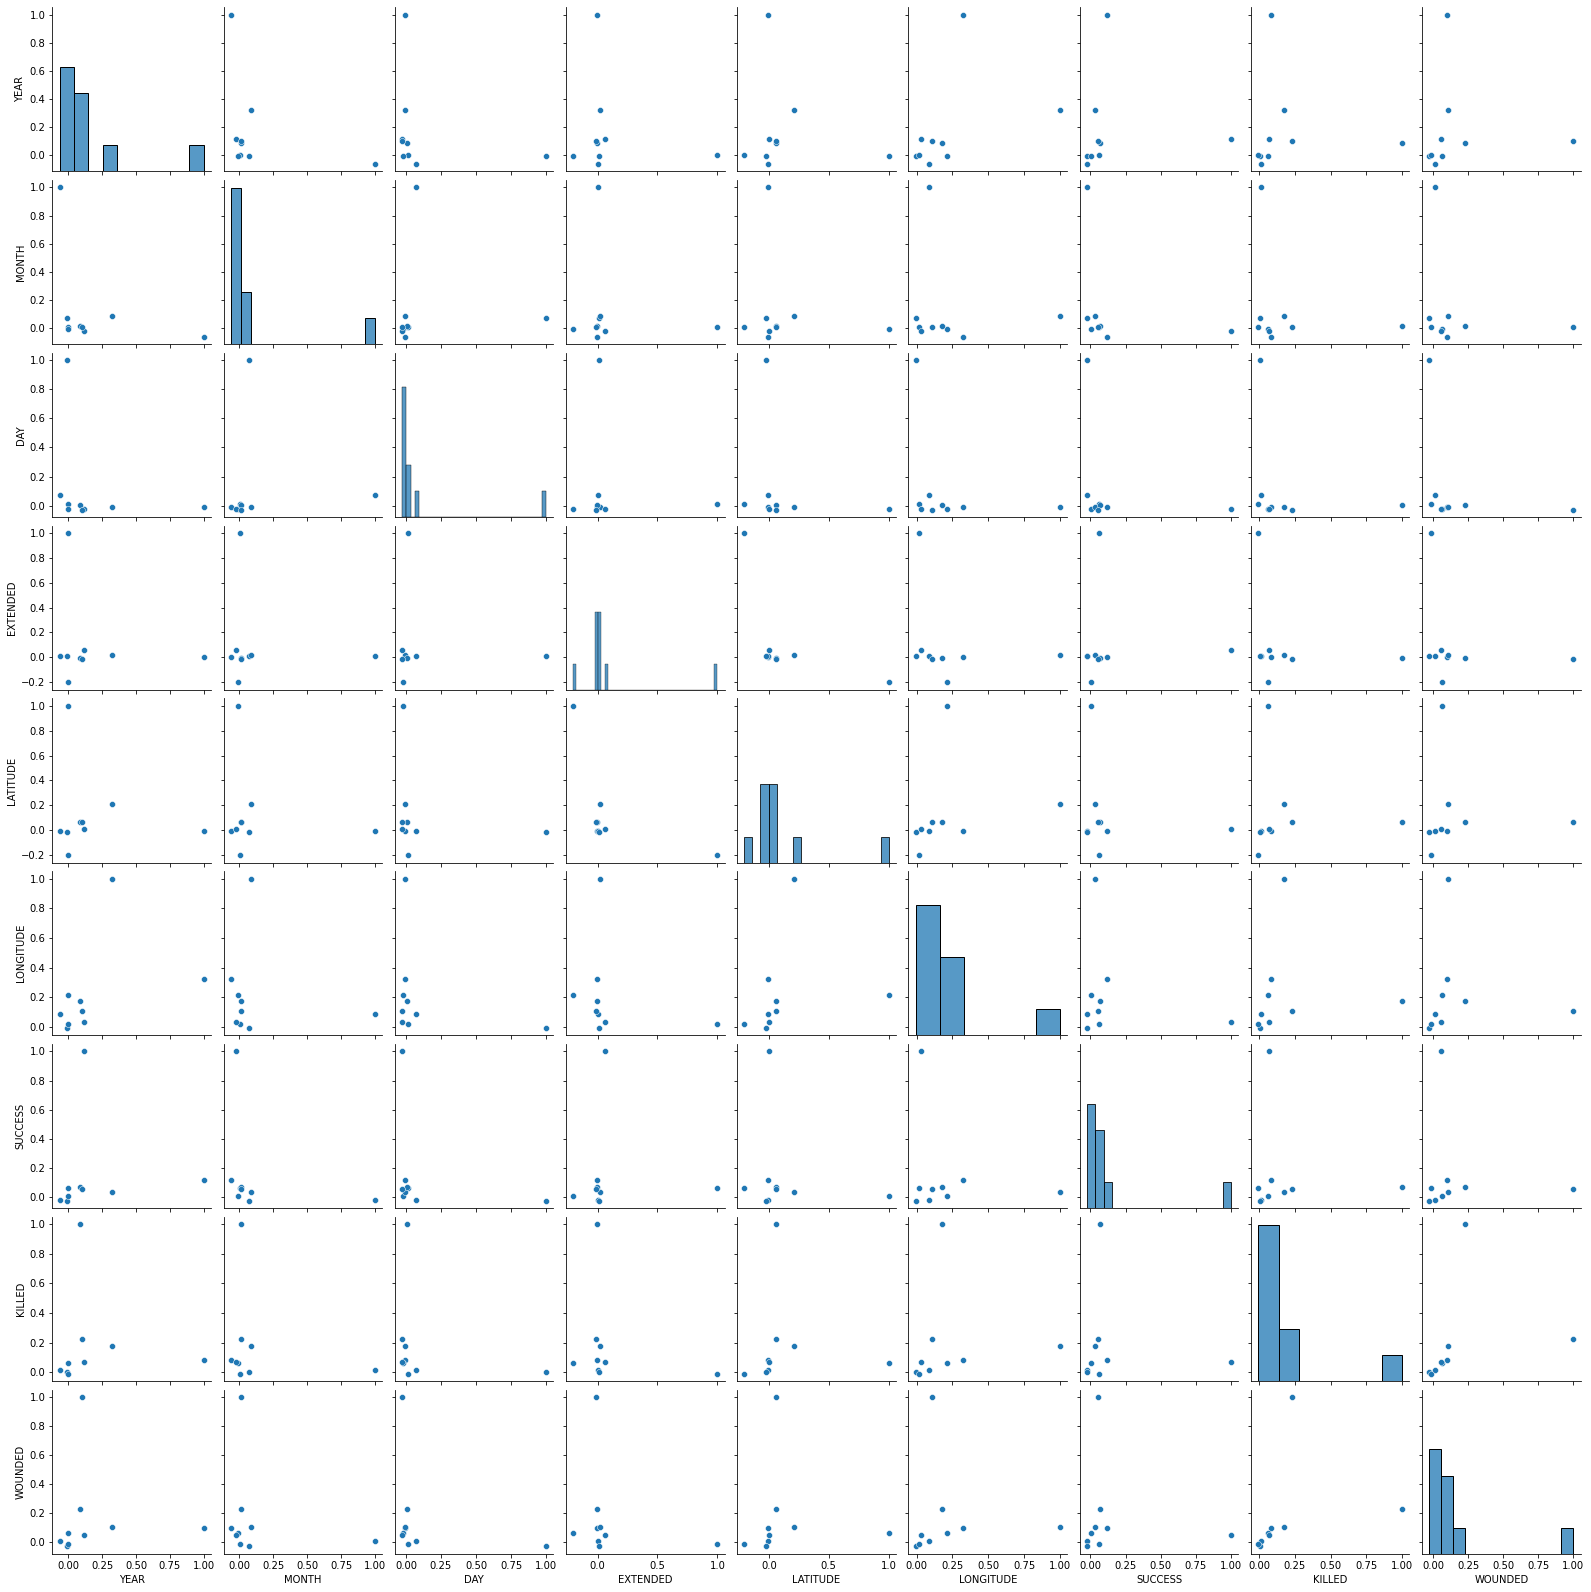

In [20]:
sns.pairplot(data.corr())

In [21]:
attack_value=data['ATTACK TYPE'].value_counts()
attack_value

Bombing/Explosion                      1293
Assassination                           711
Facility/Infrastructure Attack          370
Armed Assault                           293
Hostage Taking (Kidnapping)             157
Hijacking                                41
Hostage Taking (Barricade Incident)      22
Unknown                                  12
Unarmed Assault                          10
Name: ATTACK TYPE, dtype: int64

In [22]:
data['YEAR'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975])

In [23]:
attack_country = data.COUNTRY.value_counts()[:15]
attack_country

United States         971
United Kingdom        811
Argentina             194
West Germany (FRG)    118
Spain                 108
France                 64
Turkey                 58
Iran                   51
Italy                  49
Uruguay                48
Lebanon                33
Israel                 30
Mexico                 26
Greece                 23
Philippines            22
Name: COUNTRY, dtype: int64

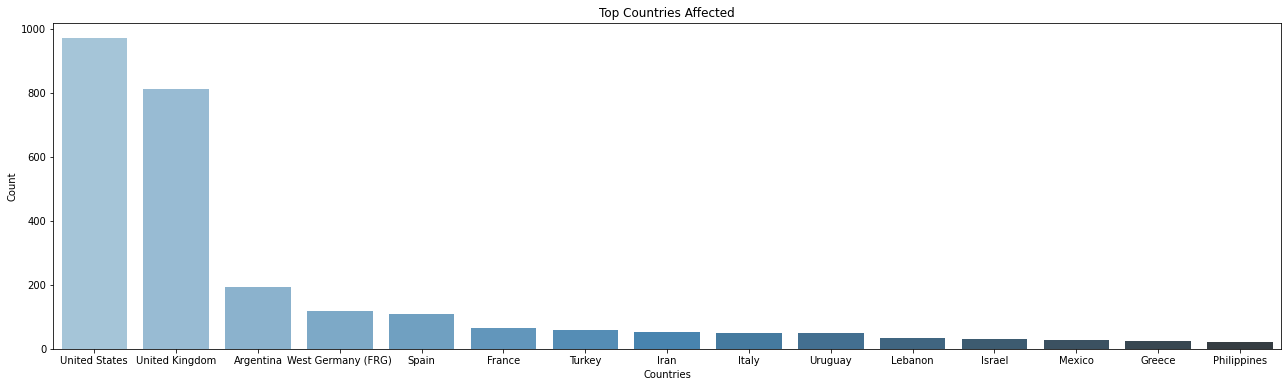

In [24]:
## Countries affected by terrorism
plt.subplots(figsize=(22,6))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
#plt.xticks(rotation= 45)
plt.show()

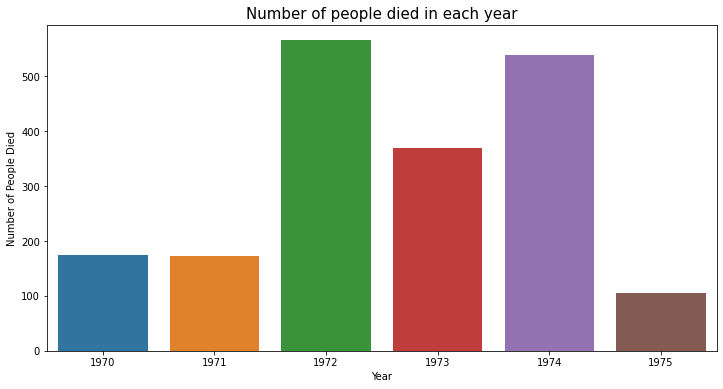

In [25]:
died_people = data[['YEAR','KILLED']].groupby(['YEAR']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(died_people.index, died_people.KILLED.values)
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.show()

In [26]:
attack_cities = data.CITY.value_counts()[:15]
attack_cities

Belfast          434
New York City    196
Buenos Aires     102
Unknown           62
Los Angeles       59
London            54
San Francisco     54
Paris             43
Montevideo        42
Ankara            38
Tehran            37
Cordoba           37
Londonderry       36
West Berlin       34
Beirut            28
Name: CITY, dtype: int64

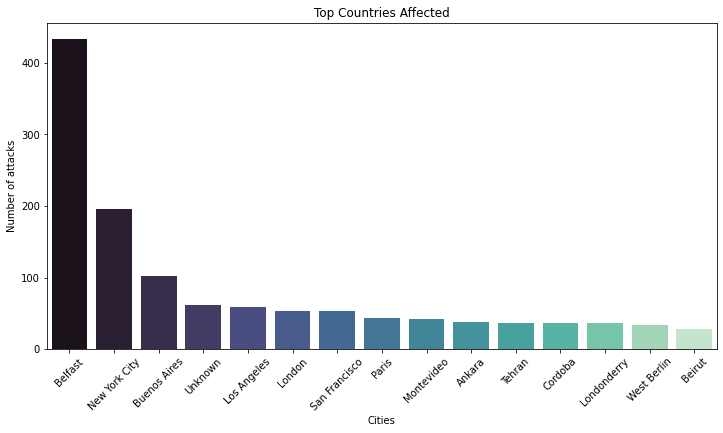

In [27]:
plt.subplots(figsize=(12,6))
sns.barplot(attack_cities.index,attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

<h2><b>Summary</b></h2
Country with most attacks:  United States
City with most attacks:  New York City
Region with the most attacks: Western Europe
Year with the most attacks: 1970
Month with the most attacks: 3
Most number of attack in Belfast
More people died in 1970 due to terrorism

Country with most attacks:  United States<br>
City with most attacks:  New York City<br>
Region with the most attacks: Western Europe<br>
Year with the most attacks: 1970<br>
Month with the most attacks: 3<br>
Most number of attack in Belfast<br>
More people died in 1970 due to terrorism